<a href="https://colab.research.google.com/github/bskdhanush/Capstone_Code/blob/main/code_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing req library and dataset  


In [524]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k 
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns
import pickle

In [455]:
from google.colab import drive
drive.mount("/content/gdrive")
df=pd.read_csv('/content/gdrive/MyDrive/data_set/Kideny_pre_processed.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Corelation matrix


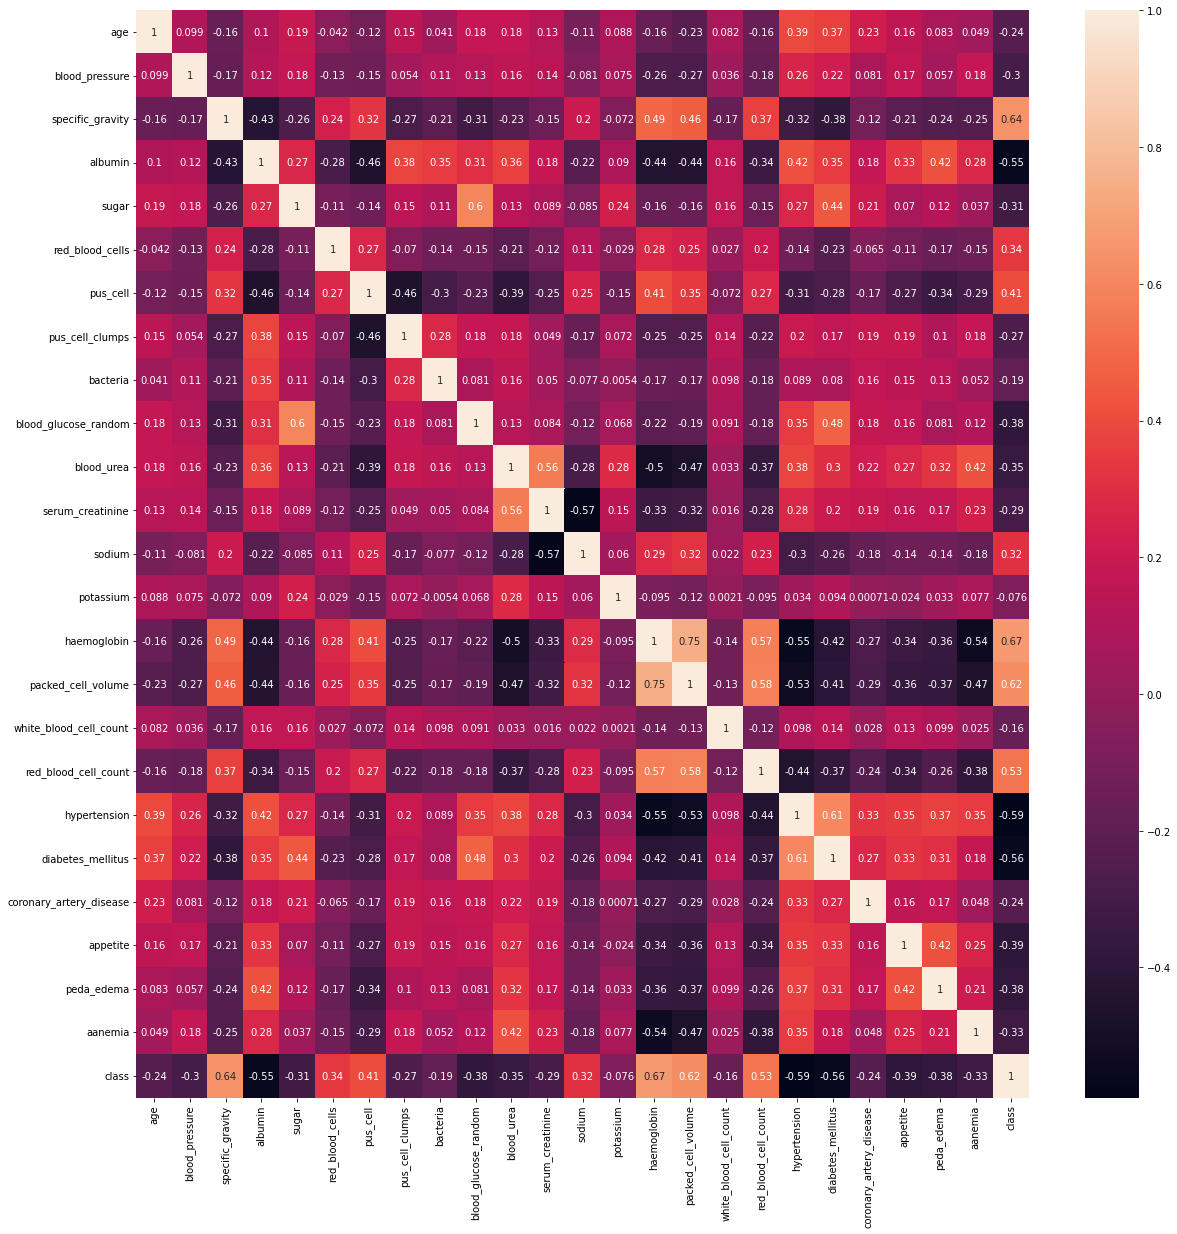

In [526]:
#finding co relation
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

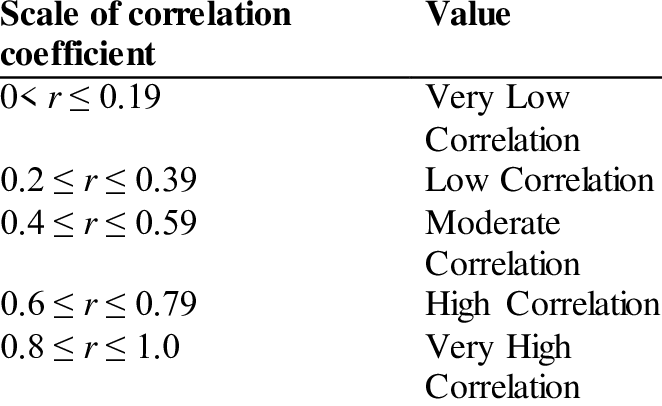

In [527]:
res=[]
arr=[]
for i in df:
 result=df[i].corr(df['class'])
 result = "%.2f" % result
 res.append(result)
 arr.append(i)

In [528]:
res = list(map(float, res))
type(res[0])

float

In [529]:
final_arr=[]
j=-1
for i in res:
  j+=1
  if i>=0.4 or i<=-0.4:
    final_arr.append(arr[j])

In [530]:
final_arr

['specific_gravity',
 'albumin',
 'pus_cell',
 'haemoglobin',
 'packed_cell_volume',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'class']

#Ann Model

In [517]:
X = df.drop(['class'], axis=1)
y = df['class']

In [518]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [519]:
model = Sequential()
model.add( Dense(256, input_dim=len(X.columns) , kernel_initializer= k.initializers.random_normal (seed=13), activation= 'relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [520]:
#Compile the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [ ]:
 #Train the model
history = model.fit(X_train, y_train, epochs = 1000, batch_size= X_train.shape[0])

Text(0.5, 0, 'epoch')

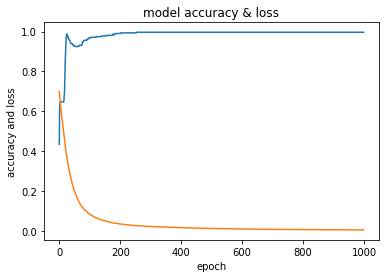

In [522]:
#Visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title( 'model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [523]:
pred =model.predict(X_test)
pred =[1 if y>=0.5 else 0 for y in pred]

ann_acc=accuracy_score(y_test,pred)


pred1 =model.predict(X_train)
pred1 =[1 if y>=0.5 else 0 for y in pred1]
 
print(f"Training Accuracy of ANN is {accuracy_score(y_train,pred1 )}")
print(f"Test Accuracy of ANN is {ann_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, pred)}")


10/10 [==============================] - 0s 2ms/step
Training Accuracy of ANN is 0.996875
Test Accuracy of ANN is 0.975 

Confusion Matrix :- 
[[43  0]
 [ 2 35]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.95      0.97        37

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



# knn,randomforest,xgb,Extra,id3,navie bayes ,gradient


In [464]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X= df[ind_col]
y= df[dep_col]

In [465]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.20,random_state = 0)

In [466]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X1_train, y1_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y1_test, knn.predict(X1_test))

print(f"Training Accuracy of KNN is {accuracy_score(y1_train, knn.predict(X1_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, knn.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, knn.predict(X1_test))}")

Training Accuracy of KNN is 0.784375
Test Accuracy of KNN is 0.625 

Confusion Matrix :- 
[[31 21]
 [ 9 19]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.78      0.60      0.67        52
           1       0.47      0.68      0.56        28

    accuracy                           0.62        80
   macro avg       0.62      0.64      0.62        80
weighted avg       0.67      0.62      0.63        80



In [467]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X1_train, y1_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y1_test, rd_clf.predict(X1_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y1_train, rd_clf.predict(X1_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, rd_clf.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, rd_clf.predict(X1_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [468]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X1_train, y1_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y1_test, xgb.predict(X1_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y1_train, xgb.predict(X1_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, xgb.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, xgb.predict(X1_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [469]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X1_train, y1_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y1_test, etc.predict(X1_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y1_train, etc.predict(X1_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, etc.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, etc.predict(X1_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9375 

Confusion Matrix :- 
[[51  1]
 [ 4 24]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.96      0.86      0.91        28

    accuracy                           0.94        80
   macro avg       0.94      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



In [470]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X1_train, y1_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y1_test, dtc.predict(X1_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y1_train, dtc.predict(X1_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, dtc.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, dtc.predict(X1_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [471]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X1_train, y1_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y1_test, gb.predict(X1_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y1_train, gb.predict(X1_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, gb.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, gb.predict(X1_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [472]:
from sklearn.naive_bayes import GaussianNB
NB=  GaussianNB()  
NB.fit(X1_train, y1_train)

NB_acc=accuracy_score(y1_test,NB.predict(X1_test))


print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y1_train, NB.predict(X1_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {NB_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y1_test, NB.predict(X1_test))}\n")
print(f"Classification Report :- \n {classification_report(y1_test, NB.predict(X1_test))}")


Training Accuracy of Gradient Boosting Classifier is 0.96875
Test Accuracy of Gradient Boosting Classifier is 0.9375 

Confusion Matrix :- 
[[51  1]
 [ 4 24]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.96      0.86      0.91        28

    accuracy                           0.94        80
   macro avg       0.94      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



In [473]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier','Naive Bayes', 'Random Forest Classifier',
             'Gradient Boosting Classifier','XgBoost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc,NB_acc, rd_clf_acc, gb_acc, xgb_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.9750
3,Random Forest Classifier,0.9750
4,Gradient Boosting Classifier,0.9750
5,XgBoost,0.9750
2,Naive Bayes,0.9375
6,Extra Trees Classifier,0.9375
0,KNN,0.6250


#Saving the model in pickle

In [474]:
#Save the model
filename='CKD_pred.pkl'
pickle.dump(tree,open(filename,'wb'))